In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("stores_sales_forecasting (1).csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values("Order Date")
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
monthly = df.groupby(
    pd.Grouper(key="Order Date", freq="M")
)["Sales"].sum().reset_index()

monthly.head()

C:\Users\naitik agrawal\AppData\Local\Temp\ipykernel_16468\224948013.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key="Order Date", freq="M")


,Order Date,Sales
0,2014-01-31,6242.525
1,2014-02-28,1839.658
2,2014-03-31,14573.956
3,2014-04-30,7944.837
4,2014-05-31,6912.787


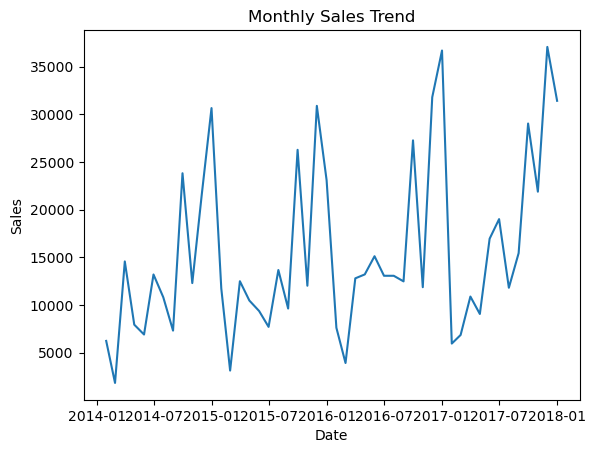

In [8]:
plt.figure()
plt.plot(monthly["Order Date"], monthly["Sales"])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

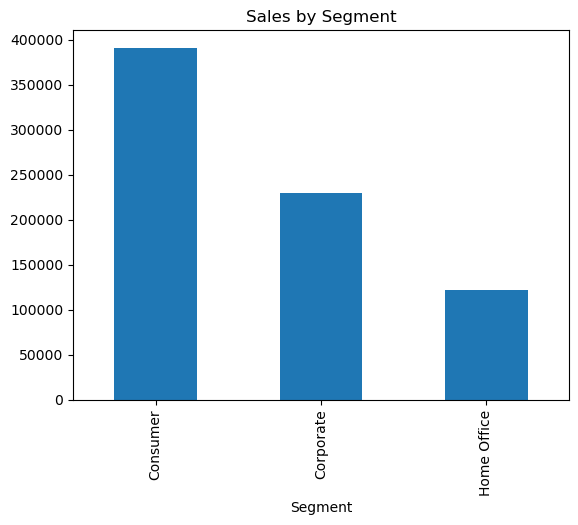

In [9]:
df.groupby("Segment")["Sales"].sum().plot(kind="bar", title="Sales by Segment")
plt.show()

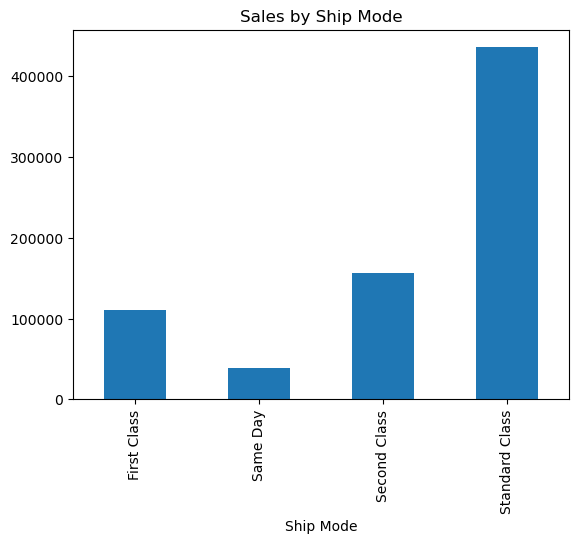

In [10]:
df.groupby("Ship Mode")["Sales"].sum().plot(kind="bar", title="Sales by Ship Mode")
plt.show()

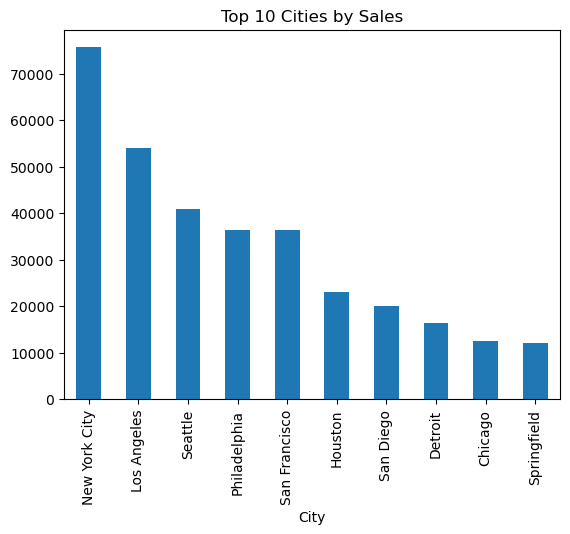

In [11]:
df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)\
.plot(kind="bar", title="Top 10 Cities by Sales")
plt.show()

In [12]:
ts = monthly.copy()
ts.columns = ["ds", "y"]   # Prophet format
ts.head()

,ds,y
0,2014-01-31,6242.525
1,2014-02-28,1839.658
2,2014-03-31,14573.956
3,2014-04-30,7944.837
4,2014-05-31,6912.787


In [16]:
pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.1 MB 1.4 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/12.1 MB 1.3 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/12.1 MB 1.4 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/12.1 MB 1.3 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/12.1 MB 1.3 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/12.1 MB 1.3 MB/s eta 0:00:09
   ------ --------------------------------- 2.1/12.1 MB 1.2 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/12.1 MB 1.2 MB/s eta 0:00:08
   -------- ------------------------------- 2.6/12.1 MB 1.2 MB/s eta 0:00:08
   --------- ------------------------------ 2.9/12.1 MB 1.2 MB/s eta 0:00:08
   ---------- ----------------------------- 3.1/12.1 MB 1.2 MB/s eta 0:00:08
   ----------

In [17]:
from prophet import Prophet

model = Prophet()
model.fit(ts)

12:17:42 - cmdstanpy - INFO - Chain [1] start processing
12:17:44 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = model.make_future_dataframe(periods=24, freq="M")
forecast = model.predict(future)

forecast.tail()

C:\Users\naitik agrawal\anaconda3\Lib\site-packages\prophet\forecaster.py:1875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
67,2019-08-31,21524.253749,13472.091915,19568.600028,21524.098366,21524.392360,-4909.321902,-4909.321902,-4909.321902,-4909.321902,-4909.321902,-4909.321902,0.0,0.0,0.0,16614.931847
68,2019-09-30,21657.467251,30466.758333,36318.635989,21657.299197,21657.618832,11713.017587,11713.017587,11713.017587,11713.017587,11713.017587,11713.017587,0.0,0.0,0.0,33370.484838
69,2019-10-31,21795.121204,18122.188903,24211.750896,21794.943572,21795.283345,-690.512662,-690.512662,-690.512662,-690.512662,-690.512662,-690.512662,0.0,0.0,0.0,21104.608541
70,2019-11-30,21928.334706,32502.916159,38545.365034,21928.146363,21928.509674,13463.406414,13463.406414,13463.406414,13463.406414,13463.406414,13463.406414,0.0,0.0,0.0,35391.741120
71,2019-12-31,22065.988658,28809.289577,34956.087406,22065.790677,22066.175949,9803.911138,9803.911138,9803.911138,9803.911138,9803.911138,9803.911138,0.0,0.0,0.0,31869.899796


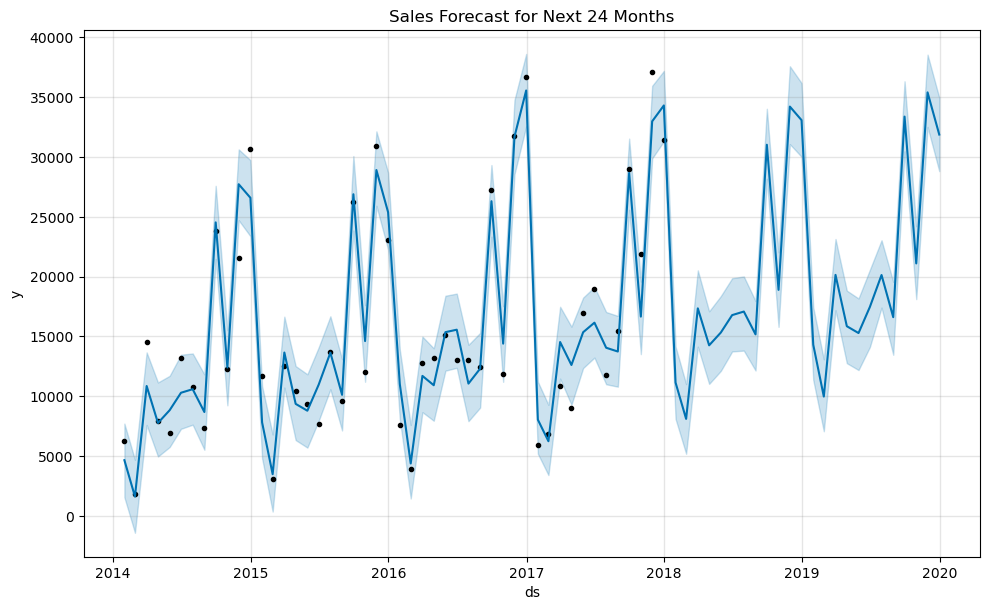

In [19]:
model.plot(forecast)
plt.title("Sales Forecast for Next 24 Months")
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred = forecast[["ds","yhat"]].set_index("ds")
actual = ts.set_index("ds")

common = actual.join(pred, how="inner")

mae = mean_absolute_error(common["y"], common["yhat"])
rmse = np.sqrt(mean_squared_error(common["y"], common["yhat"]))
mape = np.mean(np.abs((common["y"] - common["yhat"]) / common["y"])) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 1859.2959813328764
RMSE: 2370.759606745184
MAPE: 14.662172514703597


In [21]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]]\
.to_csv("forecast_output.csv", index=False)

print("forecast_output.csv created!")

forecast_output.csv created!


In [1]:
import os
os.getcwd()

'C:\\Users\\naitik agrawal'